In [ ]:
"""
Importing all necessary libraries
-----------------------------------
"""

import numpy as np
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dense,Dropout,TimeDistributed,Bidirectional,LSTM,InputLayer
import re

In [ ]:
"""
Mounting drive to the Google colab
------------------------------------
"""
from google.colab import drive
drive.mount("/content/drive")
!ls "/content/drive/MyDrive/dataset"

Mounted at /content/drive
 amazon_review_full_csv.tar.gz		      ptest_data.csv
 cleaned_data.csv			      ptrain_data.csv
'Copy of amazon_review_full_csv.tar.gz'       test.csv
'Copy of amazon_review_polarity_csv.tar.gz'   testing_data.csv
 output_NLP_30K.csv			      train.csv
 Processed_output_NLP.csv


In [ ]:
"""
Unzip the dataset tar file
"""
!tar -xvzf '/content/drive/MyDrive/dataset/Copy of amazon_review_full_csv.tar.gz'

amazon_review_full_csv/
amazon_review_full_csv/train.csv
amazon_review_full_csv/test.csv
amazon_review_full_csv/readme.txt


In [ ]:
"""
Fetching the dataset from local directory
"""
import pandas as pd
df = pd.read_csv("./amazon_review_full_csv/train.csv",header=None)
df1 = pd.read_csv("./amazon_review_full_csv/test.csv",header=None)

In [ ]:
df['text'] = df[2]
df['label'] = df[0]
df1['text'] = df1[2]
df1['label'] = df1[0]

In [ ]:
"""
Splitting the labels and text data

"""

X_train = df.text
print(X_train)
y_train = df.label-1
X_test = df1.text
y_test = df1.label-1
print(y_train.value_counts())
print(y_test.value_counts())


0          Gave this to my dad for a gag gift after direc...
1          I hope a lot of people hear this cd. We need m...
2          I'm reading a lot of reviews saying that this ...
3          The music of Yasunori Misuda is without questi...
4          Probably the greatest soundtrack in history! U...
                                 ...                        
2999995    The high chair looks great when it first comes...
2999996    I have used this highchair for 2 kids now and ...
2999997    We have a small house, and really wanted two o...
2999998    I agree with everyone else who says this chair...
2999999    not sure what this book is supposed to be. It ...
Name: text, Length: 3000000, dtype: object
4    600000
3    600000
2    600000
1    600000
0    600000
Name: label, dtype: int64
4    130000
3    130000
2    130000
1    130000
0    130000
Name: label, dtype: int64


In [ ]:
def preprocessing(data):
    """
    Preprocessing the data by removing the stopwords, non ascii, punctutations, digits
        parameters : data
        return value : processed data
    """
    preprocessed = []
    
    for sents in data:
        
        #text1 = sents.lower()
        tokens = nltk.word_tokenize(sents)
        """
            Removing Stopword
        """
        text1 = " ".join(w.lower()  for w in tokens if not w in stopwords.words())
        """
        Removing Punctuations
        """
         
        text1 = re.compile(r'[\W]').sub(r' ',text1) 
        """
        Removing Non Ascii words
        """
        text1 = re.compile(r'[^a-z0-1\s]').sub(r' ',text1)
        """
        Removing Digits
        """
        text1 = re.sub("(\s\d+)","",text1)
        preprocessed.append(text1)
        
    return preprocessed

In [ ]:
cleaned_train = preprocessing(X_train)
cleaned_test = preprocessing(X_test)
cleaned_data = pd.DataFrame()
cleaned_data['labels'] = y_train
cleaned_data['texts'] = cleaned_train

cleaned_test = pd.DataFrame()
cleaned_test['labels'] = y_test
cleaned_test['texts'] = cleaned_test


cleaned_data.to_csv("ptrain_data.csv",index=None)
#cleaned_test.to_csv("ptest_data.csv",index=None)
train = pd.read_csv("ptrain_data.csv")
#test = pd.read_csv("ptest_data.csv")


In [ ]:
test = train[100000:110000]
train = train[:100000]


In [ ]:
"""
Tokenizing the sentences and converting it into integer sequence

"""

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.texts)
train_texts = tokenizer.texts_to_sequences(train.texts)
test_texts = tokenizer.texts_to_sequences(test.texts)
MAX_FEATURES = len(tokenizer.word_index)+1

MAX_LENGTH = max(len(train_ex) for train_ex in train_texts)
train_text = pad_sequences(train_texts, maxlen=MAX_LENGTH)
test_text = pad_sequences(test_texts, maxlen=MAX_LENGTH)

In [ ]:
"""
Building a BiLSTM model

"""
model = Sequential()
model.add(Embedding(MAX_FEATURES,64,input_length=MAX_LENGTH))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
import tensorflow as tf
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
"""
One hot vectorizing the the labels
"""
y_train = tf.keras.utils.to_categorical(train.labels)

In [ ]:
"""
Fitting the model with the train dataset
"""

num_epochs = 10
history = model.fit(train_text, y_train, epochs=num_epochs,validation_split=0.2)

Epoch 1/10
2500/2500 [==============================] - 252s 101ms/step - loss: 1.3274 - accuracy: 0.4061 - val_loss: 1.2183 - val_accuracy: 0.4710
Epoch 2/10
2500/2500 [==============================] - 250s 100ms/step - loss: 1.1398 - accuracy: 0.5081 - val_loss: 1.1819 - val_accuracy: 0.4843
Epoch 3/10
2500/2500 [==============================] - 250s 100ms/step - loss: 1.0319 - accuracy: 0.5613 - val_loss: 1.2028 - val_accuracy: 0.4865
Epoch 4/10
2500/2500 [==============================] - 246s 98ms/step - loss: 0.9366 - accuracy: 0.6124 - val_loss: 1.2377 - val_accuracy: 0.4838
Epoch 5/10
2500/2500 [==============================] - 242s 97ms/step - loss: 0.8543 - accuracy: 0.6529 - val_loss: 1.2797 - val_accuracy: 0.4787
Epoch 6/10
2500/2500 [==============================] - 242s 97ms/step - loss: 0.7778 - accuracy: 0.6912 - val_loss: 1.3621 - val_accuracy: 0.4747
Epoch 7/10
2500/2500 [==============================] - 241s 96ms/step - loss: 0.7091 - accuracy: 0.7228 - val_loss

In [ ]:
"""
Predicting the output for the test data

"""

pred = model.predict(test_text)
pred1 = []
for i in range(len(pred)):
    pred1.append(np.argmax(pred[i]))


In [ ]:
"""
Generating the Classification Report and confusion matrix
"""
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Accuracy = accuracy_score(test.labels,pred1)
Classification_report = classification_report(test.labels,pred1)
cm  = confusion_matrix(test.labels,pred1)

Accuracy :  0.4561
Classification Report : 
               precision    recall  f1-score   support

           0       0.50      0.62      0.55      1858
           1       0.38      0.38      0.38      1945
           2       0.40      0.36      0.38      2104
           3       0.43      0.34      0.38      2065
           4       0.55      0.60      0.57      2028

    accuracy                           0.46     10000
   macro avg       0.45      0.46      0.45     10000
weighted avg       0.45      0.46      0.45     10000



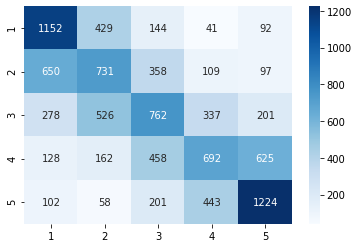

In [ ]:
"""
Creating the heatmap for the confusion matrix

"""

import seaborn as sns
sns.heatmap(cm,cmap="Blues",annot=True,fmt='.4g',xticklabels=['1','2','3','4','5'],yticklabels=['1','2','3','4','5'])


print("Accuracy : ",Accuracy)
print("Classification Report : \n",Classification_report)